# Datahåndteringsprosjekt
Laget av Elias, Aksel og Jakob

Vårt første modelleringsprosjekt er et prosjekt der du skal samle inn et datasett og gjøre statistisk analyse og regresjonsanalyse med disse dataene. Oppgaven går ut på følgende:

1. Samle inn data. Du bør måle minst 6 variabler og samle inn minst 25 målepunkter for hver av de fire variablene. Du kan bruke sensorer, spørreundersøkelser eller tilsvarende. Lagre dataene i en .txt-fil, .csv-fil eller .xlsx-fil (Excel). Hvis du finner et veldig godt datasett på internett som du heller ønsker å bruke, spør læreren om dere kan bruke det isteden.

2. Les dataene i Python og lag relevante visualiseringer som beskriver hva datasettet forteller oss.

3. Beregn relevante mål på sentraltendens og spredning. Presenter resultatene i en oversiktlig tabell. Forklar hva disse målene forteller om dataene dine. Lag gjerne visualiseringer som beskriver spredningen.

4. Regn ut korrelasjoner i datasettet og lag et korrelasjonsplott. Diskuter eventuelle korrelasjoner.

5. Gjør en lineær regresjon av to variabler der en lineær modell kan beskrive sammenhengen mellom variablene. Diskuter modellen.

Prosjektet leveres som fullstendig, sammensatt rapport (lever en .ipynb-fil og .pdf av notebooken). Husk å skrive navnet på alle i gruppa på rapporten. Alle på gruppa skal levere den samme fila på Teams.

# Introduksjon
I dette prosjektet undersøker vi korrelasjoner i diverse værdata fra flere år. Mer spesifikt har vi sett på sammenhengen mellom medianen av lufttrykk (hPa)- temperatur (C°)- skydekke(octas)- luftfuktighet(%) og vindstyrke(m/s) og summen av sollys(t) og nedbør(mm) i løpet av en dag. Tidsperioden vi har sett på er fra "2013" til "". ("Hvor står værstasjonen?").

#oversikt over deler
Dette prosjektet består av fire hoveddeler
## Innholdsfortegnelse
1. [Introduksjon](#Introduksjon)
2. [Innsamling av data](#Innsamling-av-data)
3. [Resultater](#Resultater)
    1. [Visualisering](#visualisering)
    2. [Sentraltendens og Spredning](#sentraltendens-og-spredning)
    3. [Korrelasjon](#korrelasjon)
    4. [Regresjon](#regresjon)
4. [Drøfting](#drøfting)
    1. [Visualisering](#visualisering-av-data)
    2. [Korrelasjoner](#korrelasjoner)

# Innsamling av data
Data hentet fra Metrologist Institutt via frost API

In [4]:
import Reqs
Reqs.downloadReqs() #installerer alle uvanlige pakker
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import Api  #program vi har laget for å samle 
#import DataHandler
import Utils as utils

reftime = "2013-04-01/2022-12-14"

requests found
scipy found


ModuleNotFoundError: No module named 'matplotlib'

Her henter vi dataen med en metode utils.ApiAndDataHandeling.getdata vi har laget. Med denne metoden får vi et datasett der vi kan velge hvor mange data punkter vi har lyst på. "Vi velger antall datapunkter ved å endre på n_lines som sier hvor mange dager den skal hoppe frem før neste datapunkt?"

In [3]:
df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=2)    #Henter data
df = utils.ApiAndDataHandeling.fixTable(df)

Found dataframe.csv, retrieved 12/14/22 17:37
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


# Resultater

In [4]:
df.head()

elementId,referenceTime,mean(air_pressure_at_sea_level P1D),mean(air_temperature P1D),mean(cloud_area_fraction P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(duration_of_sunshine P1D),sum(precipitation_amount P1D)
0,2013-04-01T00:00:00.000Z,1015.1,1.35,1.0,49.0,3.3,12.7,0.0
1,2013-04-03T00:00:00.000Z,1025.8,2.20,4.7,49.0,1.7,12.7,0.0
2,2013-04-05T00:00:00.000Z,1019.8,4.30,4.3,51.0,2.7,9.6,0.0
3,2013-04-07T00:00:00.000Z,1012.5,1.20,3.0,40.0,2.9,11.4,0.0
4,2013-04-09T00:00:00.000Z,1014.3,1.15,2.3,45.0,2.0,12.8,0.0


Her ser vi de fem første radene på datasettet og man kan se at det er data fra 2013-04-01, 2013-04-03, 2013-04-05... altså data fra annen hver dag.

## Visualisering

Found dataframe.csv, retrieved 12/16/22 19:11
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


<AxesSubplot: ylabel='mean(air_temperature P1D)'>

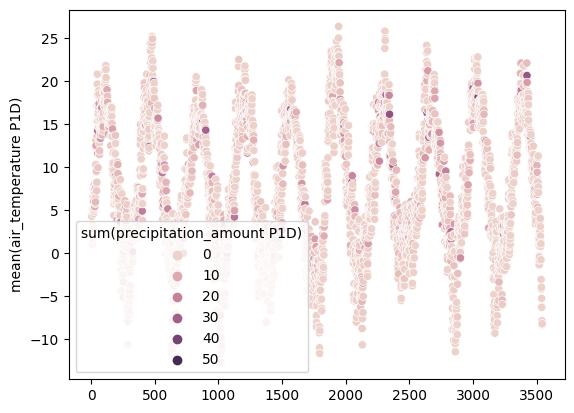

In [5]:
df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=1)
df = utils.ApiAndDataHandeling.fixTable(df)
sns.scatterplot(x= df.index, y=df["mean(air_temperature P1D)"], data=df, hue=df["sum(precipitation_amount P1D)"])

Found dataframe.csv, retrieved 12/16/22 19:12
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved
Found dataframe.csv, retrieved 12/16/22 19:12
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


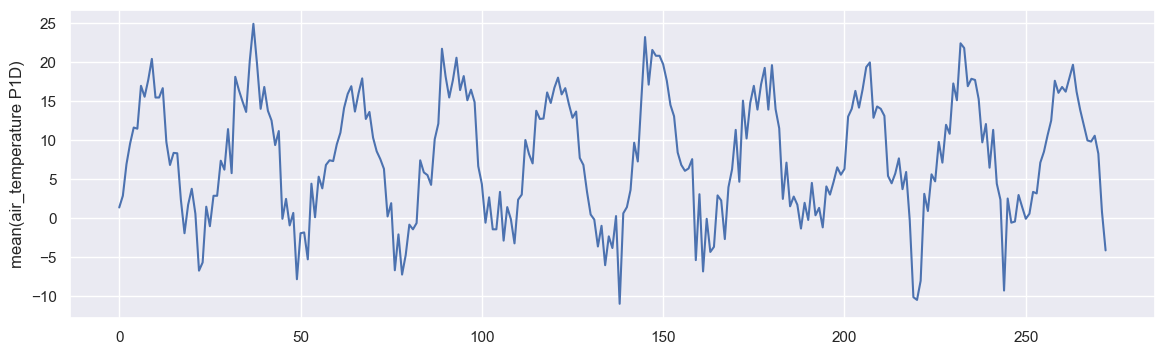

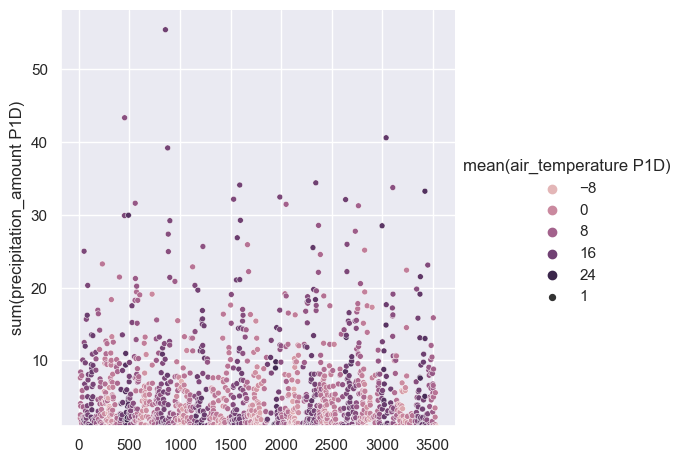

In [6]:
df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=13)
df = utils.ApiAndDataHandeling.fixTable(df)
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
plt.figure(figsize=(14, 4))
sns.lineplot(x=df.index, y=df["mean(air_temperature P1D)"],
             data=df)

df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=1)
df = utils.ApiAndDataHandeling.fixTable(df)

temp = sns.relplot(
data=df,
x=df.index, y=df["sum(precipitation_amount P1D)"],
hue=df["mean(air_temperature P1D)"], size=1,
).set(ylim=(1, None))

### Sentraltendens og spredning
Regner ut gjennomsnitt, median og standardavvik og presenterer det for hver kolonne

In [7]:
df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=1)
df = utils.ApiAndDataHandeling.fixTable(df)
mean = []
median = []
std = []
elements = []

for items in df: 
    try:
        print(items)
        mean.append(np.mean(df[items]))
        median.append(np.nanmedian(df[items]))
        std.append(np.std(df[items]))
        elements.append(items)
    except: 
        next

liste = [["Data","Gjennomsnitt","Median", "Standaravikk"]]
for i in range(len(elements)):
    if i == 8: break
    a = []
    a.append(elements[i])
    a.append(str(mean[i]))
    a.append(str(median[i]))
    a.append(str(std[i]))
    liste.append(a)
print(utils.markdown.make_markdown_table(liste))


Found dataframe.csv, retrieved 12/16/22 19:12
referenceTime
mean(air_pressure_at_sea_level P1D)
mean(air_temperature P1D)
mean(cloud_area_fraction P1D)
mean(relative_humidity P1D)
mean(wind_speed P1D)
sum(duration_of_sunshine P1D)
sum(precipitation_amount P1D)

| Data | Gjennomsnitt | Median | Standaravikk |
| --- | --- | --- | --- |
| mean(air_pressure_at_sea_level P1D) | 1011.7431151241535 | 1012.25 | 11.555090979393073 |
| mean(air_temperature P1D) | 7.932435101580135 | 7.4 | 7.608117510633469 |
| mean(cloud_area_fraction P1D) | 5.560609480812642 | 6.0 | 2.1589843964277433 |
| mean(relative_humidity P1D) | 74.07816027088036 | 77.0 | 16.070100294574992 |
| mean(wind_speed P1D) | 2.7303329571106096 | 2.5 | 1.1245301510840535 |
| sum(duration_of_sunshine P1D) | 5.207850029291154 | 4.4 | 4.913501049727695 |
| sum(precipitation_amount P1D) | 2.3664785553047407 | 0.2 | 4.747947686975231 |



| Data | Gjennomsnitt | Median | Standaravikk |
| --- | --- | --- | --- |
| mean(air_pressure_at_sea_level P1D) | 1011.608728179551 | 1012.2 | 12.157683802428378 |
| mean(air_temperature P1D) | 7.970822942643392 | 7.6499999999999995 | 7.450360855614655 |
| mean(cloud_area_fraction P1D) | 5.537655860349128 | 6.0 | 2.091594266303753 |
| mean(relative_humidity P1D) | 73.88528678304239 | 77.0 | 15.526561843285412 |
| mean(wind_speed P1D) | 2.7810473815461347 | 2.6 | 1.1503614959312025 |
| sum(duration_of_sunshine P1D) | 5.364751958224542 | 4.4 | 4.879443252342996 |
| sum(precipitation_amount P1D) | 2.3775561097256857 | 0.3 | 4.5495109503934 |


## Korrelasjon

Found dataframe.csv, retrieved 12/16/22 19:12


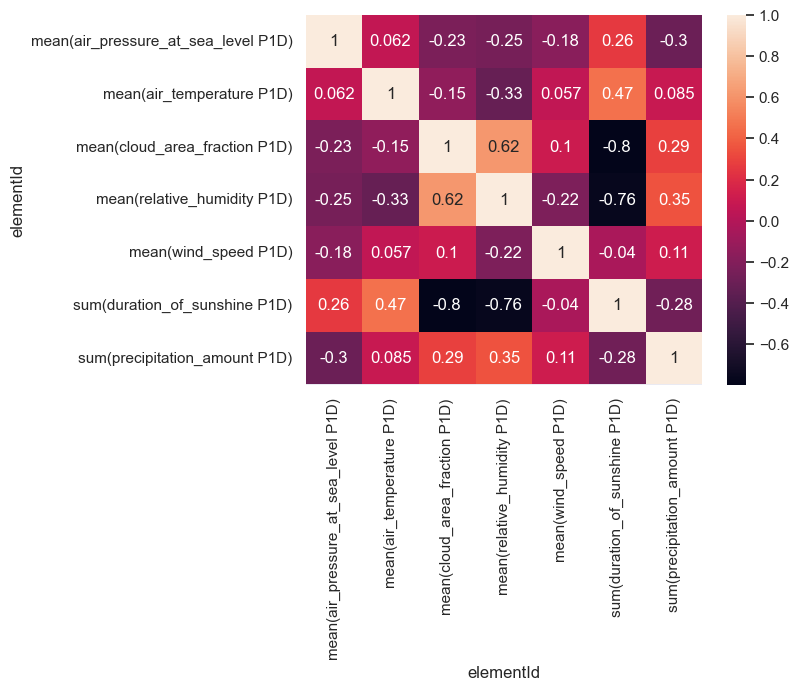

Found dataframe.csv, retrieved 12/16/22 19:12
Existing dataframe doesn't match params. New data will be retrieved
Data retrieved


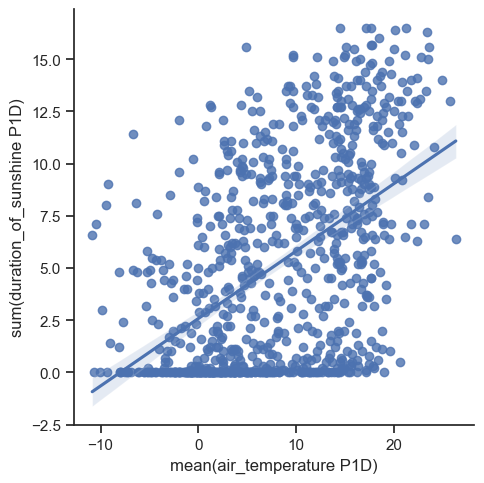

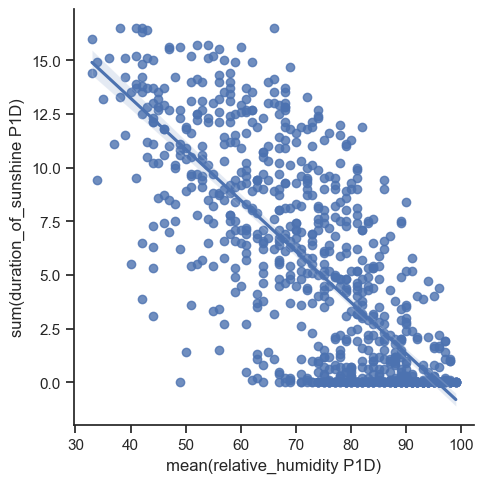

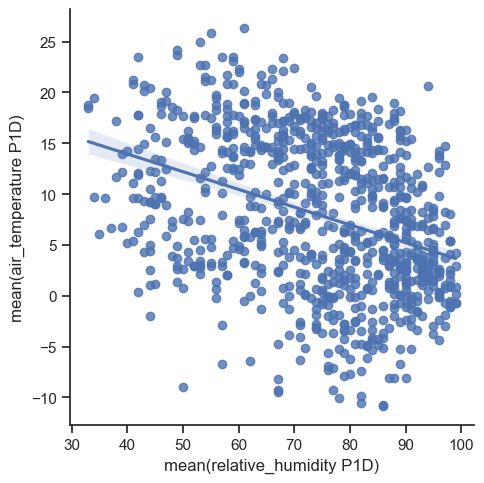

In [8]:
df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=1)
df = utils.ApiAndDataHandeling.fixTable(df)

corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

df = utils.ApiAndDataHandeling.getData(reftime=reftime, n_lines=4)
df = utils.ApiAndDataHandeling.fixTable(df)

sns.set_style(style='ticks')
sns.lmplot(data=df, y='sum(duration_of_sunshine P1D)', x='mean(air_temperature P1D)')
sns.lmplot(data=df, y='sum(duration_of_sunshine P1D)', x='mean(relative_humidity P1D)')
sns.lmplot(data=df, y='mean(air_temperature P1D)', x='mean(relative_humidity P1D)')

## Regresjon

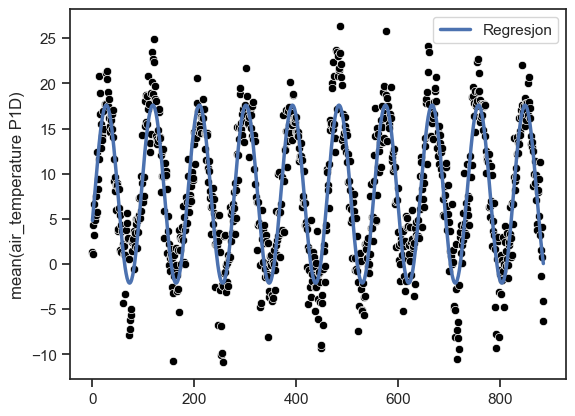

In [37]:
res = utils.regression.fit_sin(df.index, df["mean(air_temperature P1D)"])

sns.scatterplot(x=df.index, y=df["mean(air_temperature P1D)"], color="black")
sns.lineplot(x=df.index,  y=res["fitfunc"](df.index), label="Regresjon", linewidth=2.5)
plt.legend(loc="best")
plt.show()


Hvis vi tar en sin regresjon av tempraturen over tid får vi funksjonen: 9.710417823784592* sin(0.06882522486196074*x + -0.3066074043138937) + 7.7356567526062605

# Drøfting

## Visualisering av data
Vi kan se at temperaturen treffer ca. samme topp og bunn hvert år med litt variasjon. Vi kan derfor også forutse at vi ikke er på det kaldeste for i år enda men at vi ikke er så langt unna. 

På neste graf kan vi se mengden regn over tid. #TODO skriv mer om regn graf


## Korrelasjoner
Det finnes mange korrelasjoner i varmekartet, men man kan se at mange av de henger sammen. Man kan se en korrelasjon mellom mengde sollys og luftfuktighet, lufttemperatur og luftfuktiget og en veldig sterk korrelasjon mellom mengden sollys og temperatur. Mengden sollys og temperatur er svert sterkt korrelert siden sola er den største faktoren til hvor varmt det er. Dette gjør at å si at mengden sollys og temperatur er korrelert med luftfuktighet er i praksis det samme.

Vi kan også se sammenhenger mellom lufttemperatur og relativ luftfuktighet. Dette er interessant etter som de fleste erfarer at varmere luft er fuktigere, men den relativ luftfuktighet er lavere. Det stemmer at kald luft ikke klarer å ta opp like mye fuktighet varm luft, men relativ luftfuktighet er et mål på hvor mye fuktighet som er i luften sammenliknet med hvor mye det teoretisk klarer å ta opp og er derfor målt i prosent. Dette gjør derfor at selv om den absolutte luftfuktigheten er lavere, og luften oppleves som tørrere, så er den relative luftfuktigheten høy. Det er også ofte lavere luftfuktighet ved laveretemperatur fordi det skal mindre til å nå 100%.

## Regresjon
